<a href="https://colab.research.google.com/github/DheerajKondan/Bit-Coin-Prediction/blob/main/BitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
dataset1=pd.read_csv('/content/bitcoin_Price_Movement_Clustering.csv')

In [3]:
dataset1.head(5)

,Date,Open,High,Low,Close,Volume,Currency,Price Movement
0,31-12-2019,97.017212,98.649490,94.542473,97.078827,533536931,USD,Increase
1,01-01-2020,97.078827,99.849426,96.414330,97.201797,450643882,USD,Increase
2,02-01-2020,97.237602,97.740555,92.705391,92.837914,424249976,USD,Decrease
3,03-01-2020,93.084511,103.889168,92.114578,102.609962,697088052,USD,Increase
4,04-01-2020,102.699875,110.214310,102.468651,109.667091,712444844,USD,Increase


In [4]:
dataset1.shape

(680, 8)

In [5]:
dataset1.describe()

,Open,High,Low,Close,Volume
count,680.000000,680.000000,680.000000,680.000000,6.800000e+02
mean,192.101989,200.643970,183.501566,192.164710,1.240576e+09
std,53.887911,59.525745,47.903496,53.759025,9.395918e+08
min,93.084511,97.740555,88.071465,92.837914,1.244386e+08
25%,162.148823,167.605629,156.552898,162.145866,5.374908e+08
50%,177.530395,183.456581,171.336349,177.414352,9.722259e+08
75%,203.851975,211.269955,194.561649,203.707691,1.779594e+09
max,441.326813,491.635376,387.761993,441.394348,7.460265e+09


In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680 entries, 0 to 679
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            680 non-null    object 
 1   Open            680 non-null    float64
 2   High            680 non-null    float64
 3   Low             680 non-null    float64
 4   Close           680 non-null    float64
 5   Volume          680 non-null    int64  
 6   Currency        680 non-null    object 
 7   Price Movement  680 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 42.6+ KB


In [7]:
numeric_df = dataset1.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume
Open    1.000000  0.966085  0.968615  0.942173  0.642373
High    0.966085  1.000000  0.948314  0.982008  0.714134
Low     0.968615  0.948314  1.000000  0.966587  0.597430
Close   0.942173  0.982008  0.966587  1.000000  0.680266
Volume  0.642373  0.714134  0.597430  0.680266  1.000000


In [8]:
# Step 1: Modify the column based on conditions
dataset1['Price Movement'] = dataset1['Price Movement'].apply(lambda x: 1 if x == 'Increase' else (0 if x == 'Decrease' else x))
# Step 2: Save the DataFrame to a new CSV file
dataset1.to_csv('output_file.csv', index=False)


In [9]:
dataset1.head(4)

,Date,Open,High,Low,Close,Volume,Currency,Price Movement
0,31-12-2019,97.017212,98.649490,94.542473,97.078827,533536931,USD,1
1,01-01-2020,97.078827,99.849426,96.414330,97.201797,450643882,USD,1
2,02-01-2020,97.237602,97.740555,92.705391,92.837914,424249976,USD,0
3,03-01-2020,93.084511,103.889168,92.114578,102.609962,697088052,USD,1


In [10]:
x=dataset1.iloc[:,[1,4]].values
y=dataset1.iloc[:,-1].values

In [11]:
x

array([[ 97.01721191,  97.0788269 ],
       [ 97.0788269 ,  97.20179749],
       [ 97.23760223,  92.83791351],
       ...,
       [146.0258484 , 151.3834839 ],
       [151.4198456 , 151.8622437 ],
       [151.6067047 , 152.0396271 ]])

In [12]:
y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [14]:
sc=StandardScaler()

In [15]:
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(510, 2)
(170, 2)
(510,)
(170,)


In [17]:
cla=RandomForestClassifier()

In [18]:
cla.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
pred=cla.predict(x_test)

In [20]:
pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [21]:
for x in range(len(x_test)):
  print(y_test[x],pred[x])

0 0
1 1
0 0
0 1
1 1
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
1 1
0 0
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 0
0 0
0 0
1 1
0 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
0 0
0 0
1 0
0 0
0 0
0 1
1 1
1 0
0 0
1 1
0 0
1 1
1 0
0 0
1 1
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 0
1 1
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
1 1
0 1
1 1
0 0
0 0
1 1
0 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0
0 1
0 0
0 1
0 0
1 1
1 1
0 0
1 1
1 1
0 1
0 1
1 1
0 0
0 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
0 1
0 0
1 1
1 1
0 0
0 0
0 0
1 1
0 0
1 1
1 1
1 1
0 0
1 0


In [22]:
confusion_matrix(y_test,pred)

array([[78, 14],
       [ 8, 70]])

In [23]:
accuracy_score(y_test,pred)

0.8705882352941177

<ipython-input-24-f13f1a0ce794>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label=j)


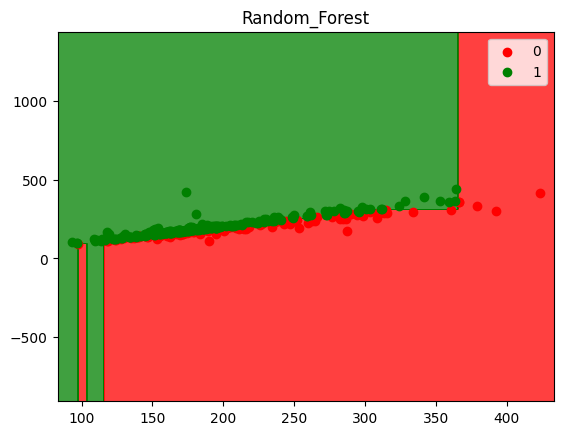

In [24]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set = sc.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10, step=1),np.arange(start=x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step = 1))
plt.contourf(x1,x2,cla.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
alpha=0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label=j)
plt.title('Random_Forest')
plt.legend()
plt.show()

# SVC

In [25]:
clus=SVC(kernel='sigmoid')
clus.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [26]:
predic=clus.predict(x_test)

In [27]:
predic

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [28]:
confusion_matrix(y_test,predic)

array([[43, 49],
       [36, 42]])

In [29]:
accuracy_score(y_test,predic)

0.5

In [30]:
for x in range(len(x_test)):
  print(y_test[x],predic[x])

0 1
1 0
0 0
0 1
1 1
1 0
0 0
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
1 1
0 0
0 0
0 0
0 1
1 1
1 0
1 0
1 1
1 1
1 1
1 1
1 0
1 1
1 1
0 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 1
1 1
0 1
1 1
0 0
1 1
0 0
0 0
1 0
0 1
0 1
0 1
1 1
1 0
0 1
1 0
0 1
1 1
1 0
0 0
1 0
0 1
0 0
1 0
0 1
0 0
0 0
0 1
1 0
1 0
0 1
1 0
0 0
1 0
1 1
0 0
0 1
0 1
0 0
1 0
1 0
0 0
1 0
0 1
0 0
1 0
0 1
1 0
0 1
0 1
1 0
1 1
1 0
1 1
1 1
1 0
0 0
1 1
0 0
1 0
1 1
0 1
0 0
0 1
0 1
1 1
0 1
1 0
1 0
1 1
1 1
1 1
1 0
0 1
0 0
1 0
0 0
0 1
1 0
0 0
1 0
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 0
1 0
0 1
1 1
1 1
0 0
0 0
1 1
0 1
0 0
0 1
1 1
0 1
0 1
1 1
1 1
0 1
0 1
0 0
1 0
1 0
0 0
0 1
0 0
1 0
0 1
1 1
1 0
1 1
0 1
1 1


<ipython-input-31-c1eff1aec72a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label=j)


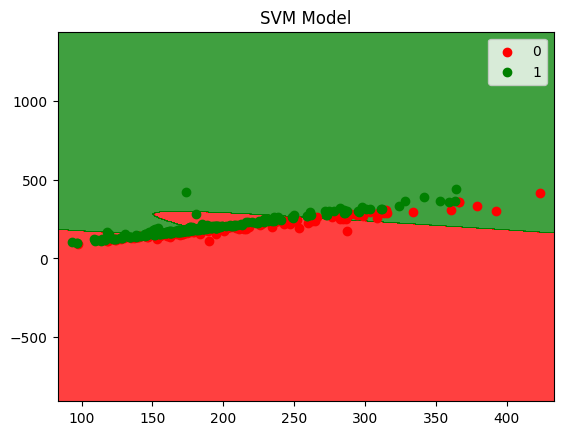

In [31]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
x_set,y_set = sc.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-10,stop=x_set[:,0].max()+10, step=1),np.arange(start=x_set[:,1].min()-1000,stop=x_set[:,1].max()+1000,step = 1))
plt.contourf(x1,x2,clus.predict(sc.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
alpha=0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label=j)
plt.title('SVM Model')
plt.legend()
plt.show()

# Liner Regression


In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train) #Training

LinearRegression()

In [34]:
pre=lr.predict(x_test)

In [35]:
pre

array([ 0.4379779 ,  0.64620087,  0.47742951,  0.45171271,  0.52211872,
        0.57465807,  0.45636219,  0.51546121,  0.47131394,  0.5207534 ,
        0.45988054,  0.48544414,  0.51053229,  0.48552784,  0.51460206,
        0.50530884,  0.53344276,  0.22781566,  0.42955829,  0.25101367,
        0.46155908,  0.97954427,  0.56152034,  0.62926084,  0.92985009,
        0.52434078,  0.63059972,  0.52752149,  0.61087928,  0.59950718,
        0.55292145,  0.50768623,  0.54196756,  0.40421564,  0.45820526,
        0.55146037,  0.44177399,  0.57066982,  0.35087397,  0.47871457,
        0.49668258,  0.40722342,  0.5833507 ,  0.42065021,  0.39820105,
        0.56410531,  0.46644073,  0.56132787,  0.46535146,  1.67272679,
        0.30560717,  0.42784919,  0.54013574, -0.07540974,  0.5036384 ,
        0.210359  ,  0.55775975,  0.54437558, -0.09235224,  0.70556426,
        0.51676217,  0.53729777,  0.54059445,  0.34865365,  0.66660072,
       -0.93265942,  0.35866078,  0.51004725,  0.51755905,  0.16

In [36]:
from sklearn.metrics import confusion_matrix

# Assuming pre contains probabilities for the positive class
threshold = 0.5
binary_predictions = (pre >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, binary_predictions)
print(cm)


[[73 19]
 [ 2 76]]


In [37]:
# Ensure pre is in integer format
pre = pre.astype(int)
print(type(y_test), type(pre))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [38]:
print(y_test[:10], pre[:10])  # Print first few values to check

[0 1 0 0 1 1 0 0 0 0] [0 0 0 0 0 0 0 0 0 0]


In [39]:
confusion_matrix(y_test,pre)

array([[92,  0],
       [77,  1]])

In [40]:
accuracy_score(y_test,pre)

0.5470588235294118

In [41]:
for x in range(len(x_test)):
  print(y_test[x],predic[x])

0 1
1 0
0 0
0 1
1 1
1 0
0 0
0 1
0 1
0 0
0 1
0 0
0 1
0 1
0 1
0 1
1 1
0 0
0 0
0 0
0 1
1 1
1 0
1 0
1 1
1 1
1 1
1 1
1 0
1 1
1 1
0 1
1 1
0 0
0 0
1 1
0 0
1 1
0 0
0 1
0 0
0 0
1 1
0 0
0 1
1 1
0 1
1 1
0 0
1 1
0 0
0 0
1 0
0 1
0 1
0 1
1 1
1 0
0 1
1 0
0 1
1 1
1 0
0 0
1 0
0 1
0 0
1 0
0 1
0 0
0 0
0 1
1 0
1 0
0 1
1 0
0 0
1 0
1 1
0 0
0 1
0 1
0 0
1 0
1 0
0 0
1 0
0 1
0 0
1 0
0 1
1 0
0 1
0 1
1 0
1 1
1 0
1 1
1 1
1 0
0 0
1 1
0 0
1 0
1 1
0 1
0 0
0 1
0 1
1 1
0 1
1 0
1 0
1 1
1 1
1 1
1 0
0 1
0 0
1 0
0 0
0 1
1 0
0 0
1 0
0 1
0 1
0 1
1 1
0 1
1 1
1 1
1 1
0 0
1 1
0 0
0 0
0 0
0 0
1 0
1 0
0 1
1 1
1 1
0 0
0 0
1 1
0 1
0 0
0 1
1 1
0 1
0 1
1 1
1 1
0 1
0 1
0 0
1 0
1 0
0 0
0 1
0 0
1 0
0 1
1 1
1 0
1 1
0 1
1 1


In [42]:
m=lr.coef_
c=lr.intercept_

In [43]:
print("slope (m): ",m[0])
print("intercept value(c): ",c)

slope (m):  -0.6668058638342383
intercept value(c):  0.5156862745098012


AttributeError: 'LinearRegression' object has no attribute 'pre'

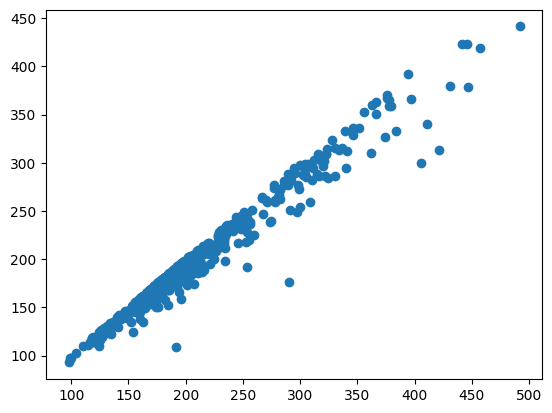

In [44]:
plt.scatter(dataset1['High'],dataset1['Close'])
plt.plot(x,lr.pre(x),color='red')
plt.xlabel('High')
plt.ylabel('Close')

# Visualization

In [45]:
import plotly.express as px
fig = px.scatter_3d(dataset1,x='Low',y='High',z='Volume',color='High',
                    size='Low',title="size--> Low    color--> High" )
fig.show()


In [46]:
dataset1.head(5)

,Date,Open,High,Low,Close,Volume,Currency,Price Movement
0,31-12-2019,97.017212,98.649490,94.542473,97.078827,533536931,USD,1
1,01-01-2020,97.078827,99.849426,96.414330,97.201797,450643882,USD,1
2,02-01-2020,97.237602,97.740555,92.705391,92.837914,424249976,USD,0
3,03-01-2020,93.084511,103.889168,92.114578,102.609962,697088052,USD,1
4,04-01-2020,102.699875,110.214310,102.468651,109.667091,712444844,USD,1


In [47]:
import seaborn as sns

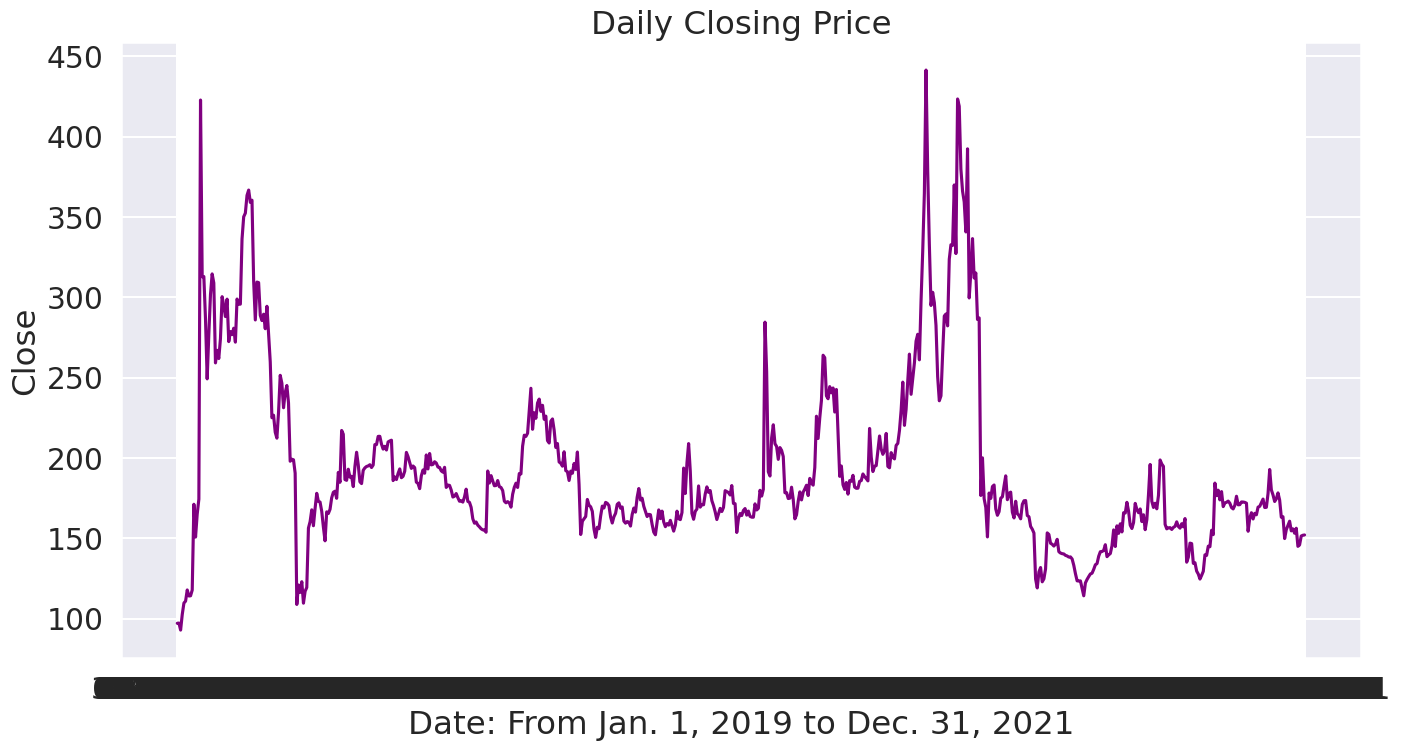

In [48]:
sns.set_context("talk",font_scale=1.3)
with sns.axes_style("darkgrid"):
  fig,ax=plt.subplots(figsize=(16,8))
  sns.lineplot(x=dataset1.Date,y=dataset1.Close,color='purple')
  ax.set_title('Daily Closing Price')
  ax.set_xlabel('Date: From Jan. 1, 2019 to Dec. 31, 2021')


In [49]:
import plotly.express as px

# Create the interactive plot
fig = px.line(dataset1, x='Date', y='Close', title='Daily Closing Price',
              labels={'Date': 'Date', 'Close': 'Closing Price'},
              template='plotly_dark',  # Optional: use a dark theme for the plot
              markers=True)

# Show the plot
fig.show()


In [50]:
import plotly.graph_objects as go
import pandas as pd

# Assuming dataset1 is your DataFrame and has 'Date' and 'Close' columns
# Ensure 'Date' is in datetime format
dataset1['Date'] = pd.to_datetime(dataset1['Date'])

# Create the figure
fig = go.Figure()

# Add the line plot
fig.add_trace(go.Scatter(x=dataset1['Date'], y=dataset1['Close'],
                         mode='lines+markers',
                         line=dict(color='purple'),
                         marker=dict(size=5),
                         text=dataset1['Close'],  # Display 'Close' value on hover
                         hoverinfo='x+y'  # Show date and value on hover
                        ))

# Update layout
fig.update_layout(
    title='Daily Closing Price',
    xaxis_title='Date: From Jan. 1, 2019 to Dec. 31, 2021',
    yaxis_title='Closing Price',
    template='plotly_dark',  # Optional: use a dark theme for the plot
    hovermode='x unified'  # Optional: improves hover interaction
)

# Show the plot
fig.show()


<ipython-input-50-c17bcf2ccf4d>:6: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

